In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
weather = pd.read_csv(r"C:\Users\datph\Downloads\corn_weekly_merged.csv")

In [15]:
print(weather[['year','region','week','tavg','prcp_sum','rh','harvested']].head())


   year                 region  week      tavg   prcp_sum         rh  \
0  2005  Semi-Arid Continental    15  5.833847  13.962251  58.017224   
1  2005  Semi-Arid Continental    16  6.762673   9.190435  53.297801   
2  2005  Semi-Arid Continental    17  2.946687  30.096704  75.871676   
3  2005  Semi-Arid Continental    18  6.715730   7.064454  65.113759   
4  2005  Semi-Arid Continental    19  8.212927  10.969492  57.662893   

   harvested  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [16]:


# Đọc dữ liệu
weather['week_ending'] = pd.to_datetime(weather['week_ending'])
weather['year'] = weather['year'].astype(int)

# Gom dữ liệu trung bình mỗi năm cho từng vùng
yearly_weather = (
    weather.groupby(['year', 'region'], as_index=False)
    [['tavg', 'tmax', 'tmin', 'prcp_sum', 'rh']]
    .mean()
)
#  Tạo danh sách năm chẵn duy nhất
even_years = sorted([y for y in yearly_weather['year'].unique() if y % 2 == 0])

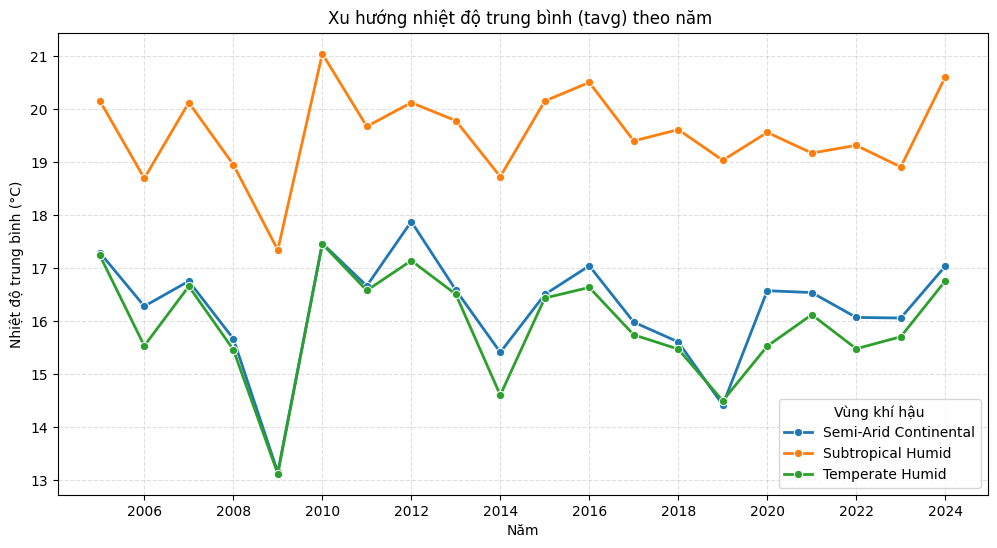

In [17]:
#  Tạo danh sách năm chẵn duy nhất
even_years = sorted([y for y in yearly_weather['year'].unique() if y % 2 == 0])

# ==============================================
# Vẽ biểu đồ – NHIỆT ĐỘ TRUNG BÌNH THEO NĂM (năm chẵn)
# ==============================================
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_weather, x='year', y='tavg', hue='region', marker='o', linewidth=2)
plt.title("Xu hướng nhiệt độ trung bình (tavg) theo năm ")
plt.xlabel("Năm")
plt.ylabel("Nhiệt độ trung bình (°C)")
plt.legend(title="Vùng khí hậu")
plt.grid(True, linestyle="--", alpha=0.4)

#  Ép matplotlib chỉ hiển thị nhãn năm chẵn
plt.xticks(even_years)

plt.show()

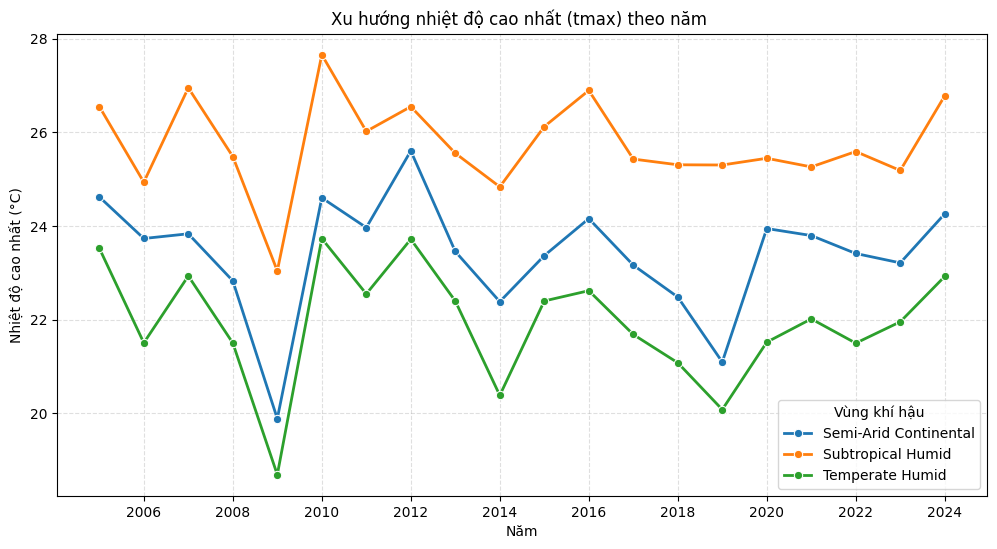

In [18]:
# Biểu đồ 2: Nhiệt độ cao nhất theo năm
yearly_tmax = weather.groupby(['year', 'region'], as_index=False)[['tmax']].mean()
even_years = sorted([y for y in yearly_tmax['year'].unique() if y % 2 == 0])

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_tmax, x='year', y='tmax', hue='region', marker='o', linewidth=2)
plt.title("Xu hướng nhiệt độ cao nhất (tmax) theo năm ")
plt.xlabel("Năm")
plt.ylabel("Nhiệt độ cao nhất (°C)")
plt.legend(title="Vùng khí hậu")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(even_years)
plt.show()

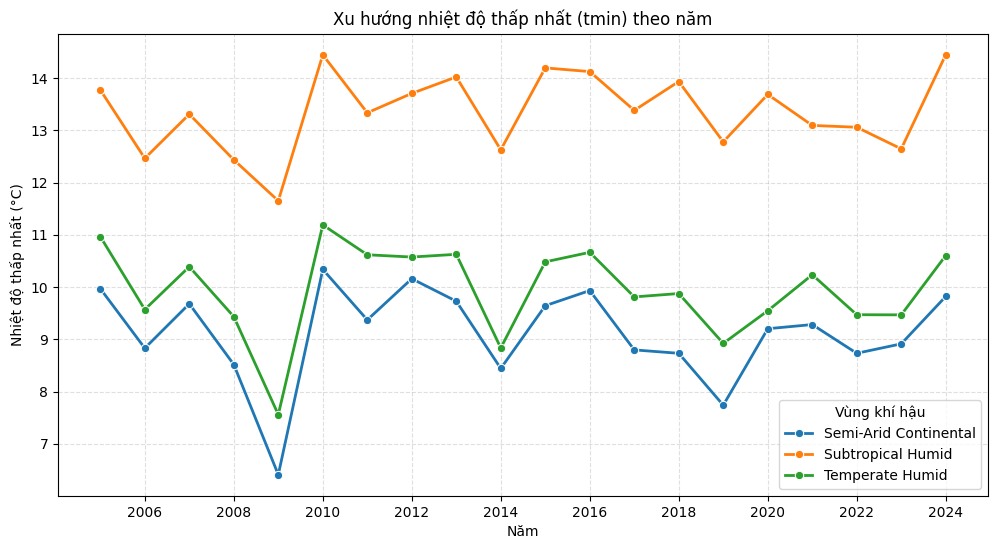

In [19]:
# Biểu đồ 3: Nhiệt độ thấp nhất theo năm
yearly_tmin = weather.groupby(['year', 'region'], as_index=False)[['tmin']].mean()
even_years = sorted([y for y in yearly_tmin['year'].unique() if y % 2 == 0])

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_tmin, x='year', y='tmin', hue='region', marker='o', linewidth=2)
plt.title("Xu hướng nhiệt độ thấp nhất (tmin) theo năm")
plt.xlabel("Năm")
plt.ylabel("Nhiệt độ thấp nhất (°C)")
plt.legend(title="Vùng khí hậu")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(even_years)
plt.show()


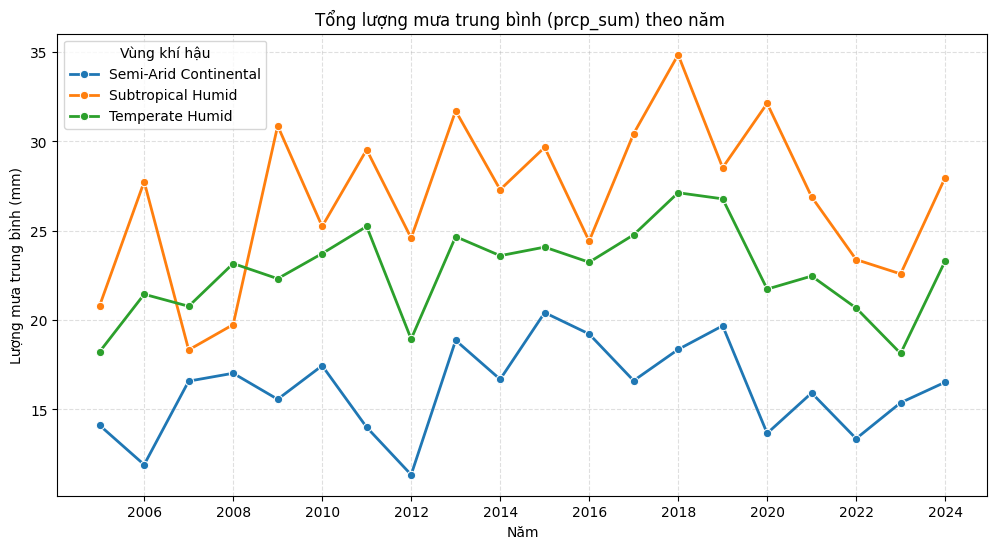

In [20]:

# Biểu đồ 4: Lượng mưa trung bình theo năm
yearly_prcp = weather.groupby(['year', 'region'], as_index=False)[['prcp_sum']].mean()
even_years = sorted([y for y in yearly_prcp['year'].unique() if y % 2 == 0])

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_prcp, x='year', y='prcp_sum', hue='region', marker='o', linewidth=2)
plt.title("Tổng lượng mưa trung bình (prcp_sum) theo năm ")
plt.xlabel("Năm")
plt.ylabel("Lượng mưa trung bình (mm)")
plt.legend(title="Vùng khí hậu")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(even_years)
plt.show()


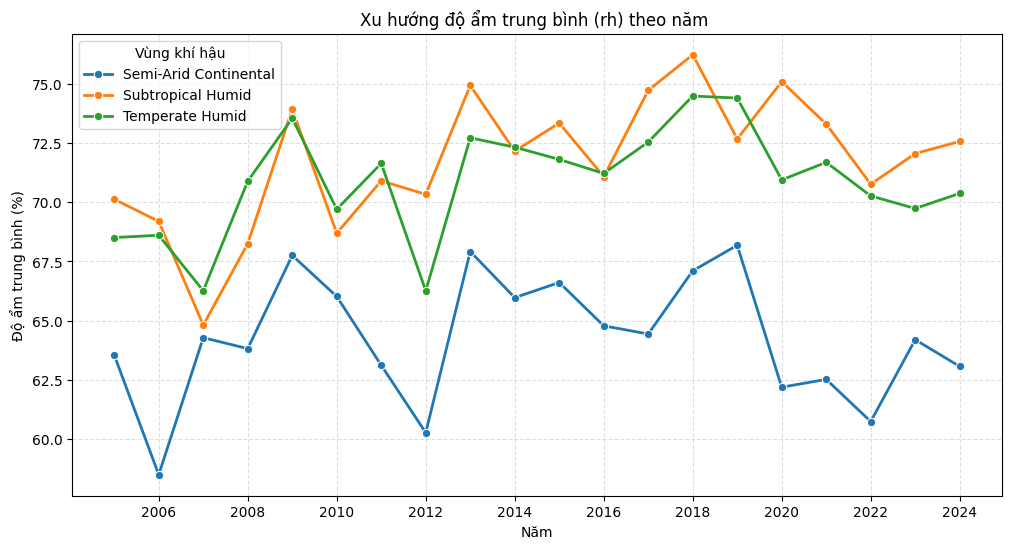

In [21]:
# Biểu đồ 5: Độ ẩm trung bình theo năm
yearly_rh = weather.groupby(['year', 'region'], as_index=False)[['rh']].mean()
even_years = sorted([y for y in yearly_rh['year'].unique() if y % 2 == 0])

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_rh, x='year', y='rh', hue='region', marker='o', linewidth=2)
plt.title("Xu hướng độ ẩm trung bình (rh) theo năm ")
plt.xlabel("Năm")
plt.ylabel("Độ ẩm trung bình (%)")
plt.legend(title="Vùng khí hậu")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(even_years)
plt.show()


 Hệ số tương quan giữa tavg, prcp_sum và rh:
              tavg  prcp_sum        rh
tavg      1.000000  0.168309  0.076924
prcp_sum  0.168309  1.000000  0.509724
rh        0.076924  0.509724  1.000000


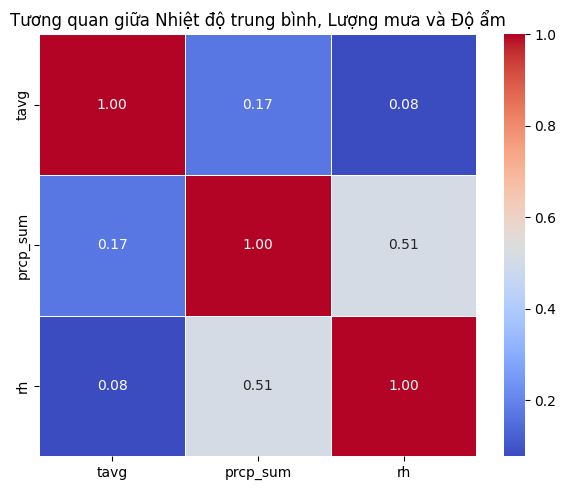

In [22]:



# Chuyển kiểu dữ liệu
weather['week_ending'] = pd.to_datetime(weather['week_ending'])
weather['year'] = weather['year'].astype(int)

# Chọn 3 biến cần phân tích
data = weather[['tavg', 'prcp_sum', 'rh']]

# =======================================
# Tính hệ số tương quan (Pearson)
# =======================================
corr_matrix = data.corr(method='pearson')

print(" Hệ số tương quan giữa tavg, prcp_sum và rh:")
print(corr_matrix)

# =======================================
#  Trực quan hóa ma trận tương quan
# =======================================
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Tương quan giữa Nhiệt độ trung bình, Lượng mưa và Độ ẩm")
plt.tight_layout()
plt.show()
